In [1]:
import numpy as np
import pandas as pd 
import scipy as sp 
import matplotlib.pyplot as plt 
from plotnine import *

In [2]:
ratings_df = pd.read_csv('/Users/shivasaivummaji/Desktop/CS:DS/Semesters/Fall 2023/CS 242/Project3/ml-latest-small/ratings.csv')

In [3]:
ratings_df.head()
ratings_df.shape

(100836, 4)

Transforming Data (5 pts)

In [12]:
# Transforming the data into a user-movie matrix
ratings_mtx_df = ratings_df.pivot_table(values='rating', index='userId', columns='movieId')
ratings_mtx_df.fillna(0, inplace=True)
ratings_mtx_df

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
ratings_mtx_df.shape

(610, 9724)

In [13]:
# Top 3 movies with most number of users who have rated it
num_users_per_movie = ratings_df.groupby('movieId')['userId'].count()
num_users_per_movie.sort_values(ascending=False, inplace=True)
num_users_per_movie.head(3)

movieId
356    329
318    317
296    307
Name: userId, dtype: int64

In [7]:
# Top 3 users who have rated the greatest number of movies
num_movies_per_user = ratings_df.groupby("userId")["movieId"].count()
num_movies_per_user.sort_values(ascending=False, inplace=True)
num_movies_per_user.head(3)

userId
414    2698
599    2478
474    2108
Name: movieId, dtype: int64

Clustering (15 pts)

In [8]:
from sklearn.cluster import KMeans

In [48]:
ratings_mtx_df = ratings_mtx_df.transpose()
ratings_mtx_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


/Users/shivasaivummaji/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/Users/shivasaivummaji/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/Users/shivasaivummaji/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/Users/shivasaivummaji/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/Users/shivasaivummaji/miniconda3/lib/py

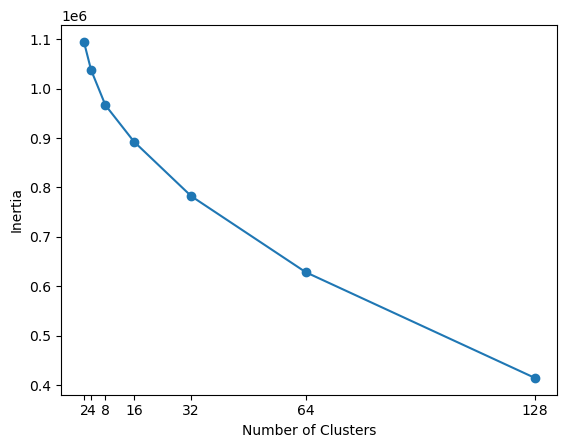

In [14]:
# a) 
ratings_mtx_df.columns = ratings_mtx_df.columns.astype(str)
k_vals = [2, 4, 8, 16, 32, 64, 128]
inertia = []
for k in k_vals:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(ratings_mtx_df)
    inertia.append(kmeans.inertia_)

plt.plot(k_vals, inertia, marker = 'o')
plt.xticks(k_vals)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


/Users/shivasaivummaji/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/Users/shivasaivummaji/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/Users/shivasaivummaji/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/Users/shivasaivummaji/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/Users/shivasaivummaji/miniconda3/lib/py

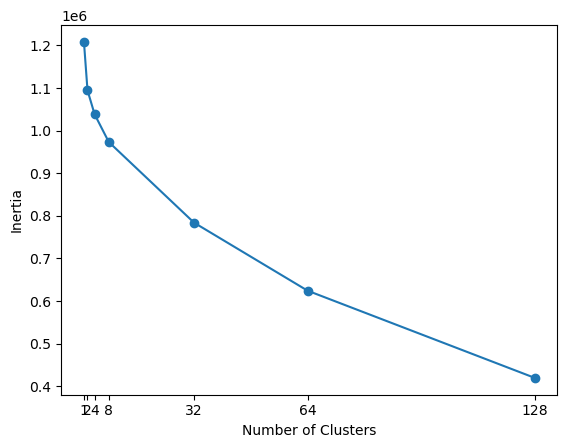

In [9]:
# a) 
ratings_mtx_df.columns = ratings_mtx_df.columns.astype(str)
k_vals = [1, 2, 4, 8, 32, 64, 128]
inertia = []
for k in k_vals:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(ratings_mtx_df)
    inertia.append(kmeans.inertia_)

plt.plot(k_vals, inertia, marker = 'o')
plt.xticks(k_vals)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [10]:
# The inertia scores for each value of k:
inertia

[1208281.232786885,
 1094664.3508473523,
 1038459.7928110538,
 973276.7638693539,
 784031.7309704124,
 624230.571641922,
 419494.9663767263]

From the above results, the most appropriate value of k for this data is 8. In order to find the best choice of k, we can use the elbow method. According to the slides, choosing the k at the elbow (when k = 8) in the plot with inertia vs. number of clusters is an optimal way to find the best k. As a result, I belive that a k of 8 is the best choice.

In [58]:
# c) 
# When k = 8:
kmeans = KMeans(n_clusters = 8, random_state = 0)
kmeans.fit_predict(ratings_mtx_df)
cen = kmeans.cluster_centers_
cen

# For each resulting cluster, find the top 3 movies that are rated the highest (on average) by users in that cluster
top_3_movies = []
for i in range(8):
    top_3_movies.append(np.argsort(cen[i])[-3:])
top_3_movies

/Users/shivasaivummaji/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


[array([379, 609, 413]),
 array([605, 413, 473]),
 array([116, 413,   5]),
 array([ 67, 609, 413]),
 array([598, 473, 413]),
 array([473, 598, 413]),
 array([447, 598, 413]),
 array([609, 413, 248])]

Principle Component Analysis (15 pts)

In [60]:
# a)
ratings_mtx_df = ratings_mtx_df.transpose()
trans_ratings_mtx = np.transpose(ratings_mtx_df)
trans_ratings_mtx

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
# Mean centering the data
trans_ratings_mtx.mean(axis = 1)
center = lambda x: x - x.mean()
centered_mtx = center(trans_ratings_mtx)
centered_mtx

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,3.895825,-0.011775,-0.00977,-0.07898,3.983546,-0.112814,4.449506,-0.017277,-0.015426,-0.047203,...,3.954031,-0.0471,3.659811,2.964212,3.927036,2.080625,3.92719,2.232158,2.987557,4.506119
2,-0.104175,-0.011775,-0.00977,-0.07898,-0.016454,3.887186,-0.050494,3.982723,-0.015426,-0.047203,...,-0.045969,3.9529,-0.340189,4.964212,3.427036,-0.419375,-0.07281,1.732158,-0.012443,-0.493881
3,3.895825,-0.011775,-0.00977,-0.07898,-0.016454,4.887186,-0.050494,-0.017277,-0.015426,-0.047203,...,-0.045969,-0.0471,-0.340189,-0.035788,-0.072964,-0.419375,-0.07281,1.732158,-0.012443,-0.493881
4,-0.104175,-0.011775,-0.00977,-0.07898,-0.016454,2.887186,-0.050494,-0.017277,-0.015426,-0.047203,...,-0.045969,-0.0471,-0.340189,-0.035788,-0.072964,-0.419375,-0.07281,-0.267842,-0.012443,-0.493881
5,-0.104175,-0.011775,-0.00977,-0.07898,-0.016454,4.887186,-0.050494,-0.017277,-0.015426,-0.047203,...,-0.045969,-0.0471,-0.340189,2.964212,-0.072964,-0.419375,-0.07281,-0.267842,-0.012443,-0.493881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,-0.104175,-0.011775,-0.00977,-0.07898,-0.016454,-0.112814,-0.050494,-0.017277,-0.015426,-0.047203,...,-0.045969,-0.0471,-0.340189,-0.035788,-0.072964,-0.419375,-0.07281,-0.267842,-0.012443,-0.493881
193583,-0.104175,-0.011775,-0.00977,-0.07898,-0.016454,-0.112814,-0.050494,-0.017277,-0.015426,-0.047203,...,-0.045969,-0.0471,-0.340189,-0.035788,-0.072964,-0.419375,-0.07281,-0.267842,-0.012443,-0.493881
193585,-0.104175,-0.011775,-0.00977,-0.07898,-0.016454,-0.112814,-0.050494,-0.017277,-0.015426,-0.047203,...,-0.045969,-0.0471,-0.340189,-0.035788,-0.072964,-0.419375,-0.07281,-0.267842,-0.012443,-0.493881


In [64]:
# b)

# Apply PCA to the centered data with k = 2 to reduce the dimensionality of the data
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(centered_mtx)
components = pca.components_
variance = pca.explained_variance_ratio_

print("Components: ", components)
print("Variance: ", variance)


Components:  [[ 0.0596384   0.00626322  0.00064958 ...  0.11854893  0.00856716
   0.12143586]
 [-0.06213091  0.01767434 -0.00203417 ... -0.01227979 -0.01400113
   0.20316443]]
Variance:  [0.17620942 0.04189505]


In [65]:
data = pca.transform(centered_mtx)
data

array([[36.08628948, -6.56697642],
       [18.25096024, -0.5457696 ],
       [ 5.9010157 , -5.71235752],
       ...,
       [-2.41929577,  0.1622625 ],
       [-2.41929577,  0.1622625 ],
       [-2.28512166,  0.31652079]])

In [91]:
# c)
# Movies Data Frame
movies_df = pd.read_csv('/Users/shivasaivummaji/Desktop/CS:DS/Semesters/Fall 2023/CS 242/Project3/ml-latest-small/movies.csv')
movies_df.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [93]:
# Getting genre for each movie
genre = []
for i in range(len(movies_df)):
    genre.append(movies_df.iloc[i]['genres'].split('|')[0])
genre_df = pd.DataFrame(genre, columns = ['genre'])
genre_df.head()

,genre
0,Adventure
1,Adventure
2,Comedy
3,Comedy
4,Comedy


In [94]:
# Combine the genre data frame with the movies data frame
movies_df = pd.concat([movies_df, genre_df], axis = 1)
movies_df

,movieId,title,genres,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure
1,2,Jumanji (1995),Adventure|Children|Fantasy,Adventure
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Comedy
4,5,Father of the Bride Part II (1995),Comedy,Comedy
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,Action
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,Animation
9739,193585,Flint (2017),Drama,Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,Action


In [101]:
# Assign a color to each genre
color_g = []
for i in genre:
    color_g.append(np.random.rand(3,))
color_g

[array([0.55468546, 0.81942767, 0.24767748]),
 array([0.78486261, 0.80761763, 0.82064245]),
 array([0.73257973, 0.67306118, 0.90316493]),
 array([0.82751935, 0.86057268, 0.2042362 ]),
 array([0.17192823, 0.39246997, 0.44021976]),
 array([0.10909144, 0.15257675, 0.57734155]),
 array([0.62031904, 0.32707024, 0.6660432 ]),
 array([0.66770352, 0.56665571, 0.81505664]),
 array([0.27104875, 0.14604756, 0.48624214]),
 array([0.70349295, 0.4309846 , 0.20226752]),
 array([0.43335997, 0.85315341, 0.40194367]),
 array([0.47401777, 0.91915921, 0.57542578]),
 array([0.62229017, 0.13344834, 0.9221904 ]),
 array([0.17388919, 0.43945502, 0.46257882]),
 array([0.99730574, 0.5522503 , 0.14424103]),
 array([0.56632005, 0.17002252, 0.71190929]),
 array([0.14372829, 0.08025115, 0.44283501]),
 array([0.36151992, 0.34496293, 0.0054279 ]),
 array([0.19004965, 0.21351031, 0.41364381]),
 array([0.92844274, 0.8521822 , 0.36911363]),
 array([0.90094477, 0.58744905, 0.92009349]),
 array([0.12905253, 0.20189899, 0.

ValueError: 'c' argument has 9742 elements, which is inconsistent with 'x' and 'y' with size 9725.

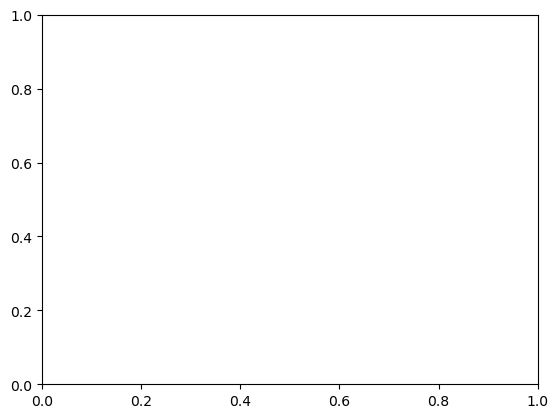

In [103]:
# Plot the results of data after PCA with k = 2 and color each point by its genre
plt.scatter(data[:, 0], data[:, 1], c = color_g)